# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Durante minha formação como cientista de dados na EBAC, foi solicitado uma previsão de renda para uma empresa parceira, a Stefanini. Essa previsão de renda será feita utilizando regressão linear com o objetivo de ter uma previsão mais próxima possivel da realidade, essa regressão linear irá ajudar a empresa a entender melhor sua base de clientes e quais propostas podem ser ofertadas para futuros clientes baseando se em seu histórico. 



## Etapa 2 Crisp-DM: Entendimento dos dados
Os dados forma retirados da base de clientes já cadastrados da empresa, os dados estão em ``.csv`` e estão distribuidos dessa forma


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  DATA DO CADASTRO                                   | DATETIME     |
| id_cliente              |  CÓDIGO DE CADASTRO DO CLIENTE                      | INT          |
| sexo                    |  SEXO DO CLIENTE                                    | OBJECT       |
| posse_de_veiculo        |  CLIENTE POSSUI VEICULO                             | BOOL         |
| posse_de_imovel         |  CLIENTE POSSUI IMÓVEL                              | BOLL         |
| qtd_filhos              |  QUANTIDADE DE FILHOS DO CLIENTE                    | INT          |
| tipo_renda              |  FONTE DE RENDA DO CLIENTE                          | STRING       |
| educacao                |  FORMAÇÃO EDUCACIONAL DO CLIENTE                    | STRING       |
| estado_civil            |  ESTADO CIVIL DO CLIENTE                            | STRING       |
| tipo_residencia         |  TIPO DE RESIDÊNCIA DO CLIENTE                      | STRING       |
| idade                   |  IDADE DO CLIENTE                                   | INT          |
| tempo_emprego           |  TEMPO DO EMPREGO DO CLIENTE EM ANOS                | FLOAT        |
| qt_pessoas_residencia   |  QUANTIDADE DE PESSOAS QUE RESIDEM COM O CLIENTE    | INT          |
| renda                   |  RENDA DO CLIENTE                                   | FLOAT        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Vizualização da árvore
import graphviz


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv("input\previsao_de_renda.csv")

In [3]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
renda.drop(axis=1, labels="Unnamed: 0", inplace=True)

In [5]:
renda.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

[]

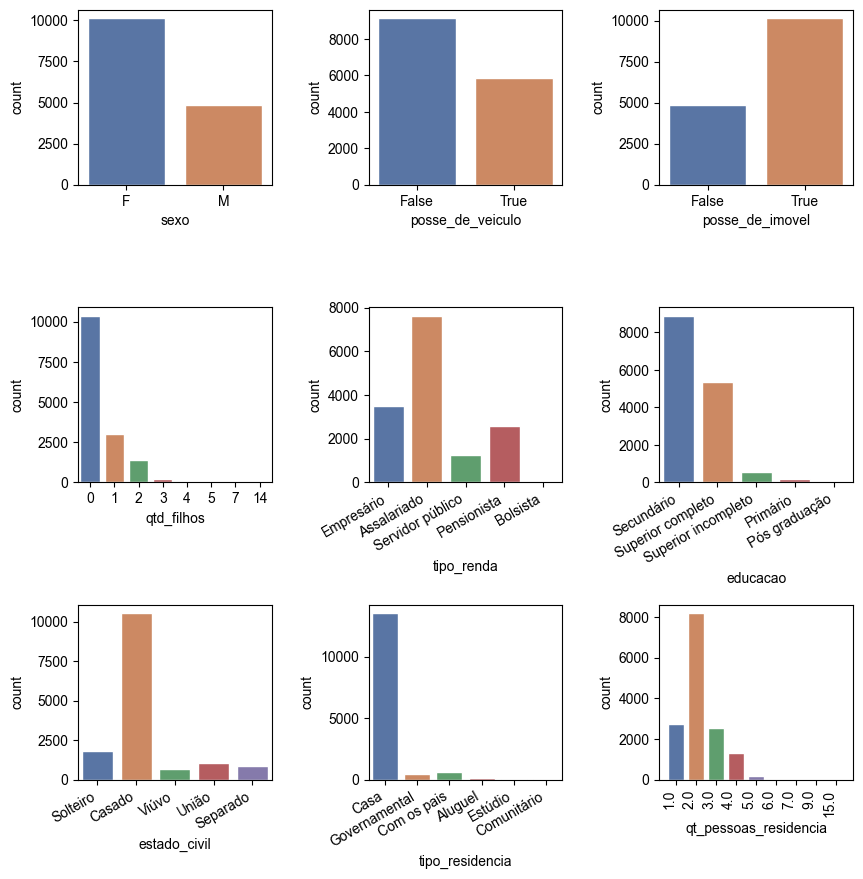

In [6]:
fig, axes = plt.subplots(3, 3, figsize=[10,10])

sns.set(style="whitegrid")
sns.countplot(ax=axes[0,0], x='sexo', data=renda)
sns.countplot(ax=axes[0,1], x="posse_de_veiculo", data=renda)
sns.countplot(ax=axes[0,2], x="posse_de_imovel", data=renda)
sns.countplot(ax=axes[1,0], x="qtd_filhos", data=renda)
sns.countplot(ax=axes[1,1], x="tipo_renda", data=renda)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=30, ha="right")
sns.countplot(ax=axes[1,2], x="educacao", data=renda)
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=30, ha="right")
sns.countplot(ax=axes[2,0], x="estado_civil", data=renda)
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=30, ha="right")
sns.countplot(ax=axes[2,1], x="tipo_residencia", data=renda)
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=30, ha="right")
sns.countplot(ax=axes[2,2], x="qt_pessoas_residencia", data=renda)
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=90, ha="right")

plt.subplots_adjust(hspace=0.7, wspace=0.5)
plt.plot()

In [7]:
# Categorizando tempo_emprego
renda["cat_tempo_emprego"] = None
renda.loc[renda["tempo_emprego"] <= 1, "cat_tempo_emprego"] = "1 ano ou menos" 
renda.loc[(renda["tempo_emprego"] > 1) & (renda["tempo_emprego"] <= 5), "cat_tempo_emprego"] = "entre 5 e 1" 
renda.loc[(renda["tempo_emprego"] > 5) & (renda["tempo_emprego"] <= 10), "cat_tempo_emprego"] = "entre 5 e 10" 
renda.loc[renda["tempo_emprego"] > 10, "cat_tempo_emprego"] = "mais que 10" 


<Axes: xlabel='idade', ylabel='Count'>

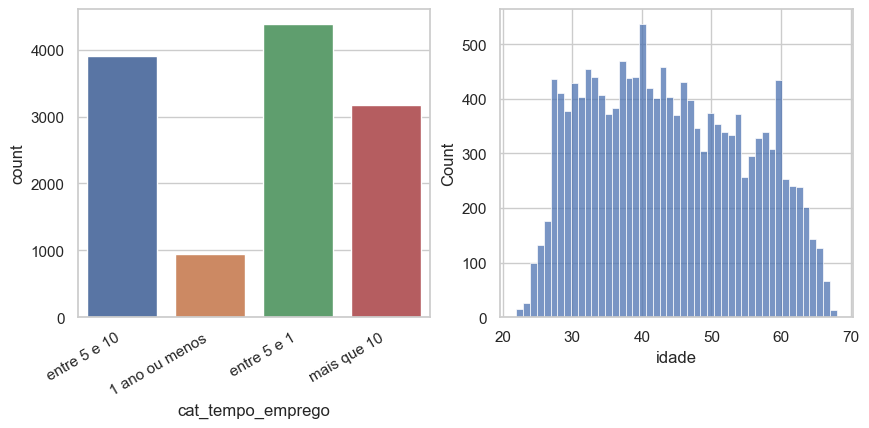

In [8]:
fig, axes = plt.subplots(1,2, figsize=[10,4])
sns.countplot(ax=axes[0], x="cat_tempo_emprego", data=renda)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")
sns.histplot(ax=axes[1], x="idade", data=renda, bins=47)


### Entendimento dos dados - Bivariadas




C:\Users\carlo\AppData\Local\Temp\ipykernel_6540\2827052393.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=20)
C:\Users\carlo\AppData\Local\Temp\ipykernel_6540\2827052393.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=20)


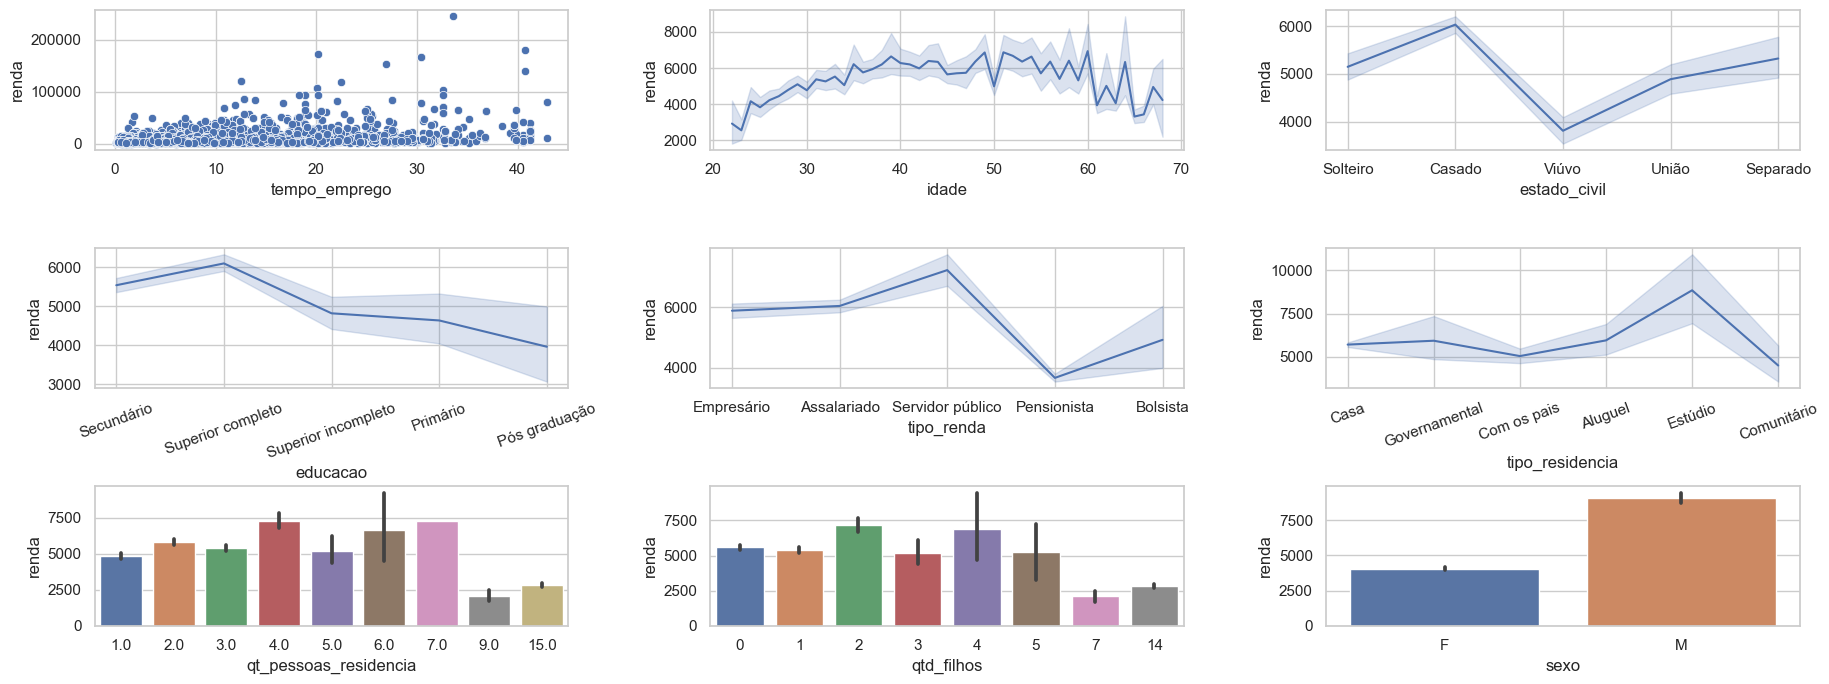

In [9]:
fig, axes = plt.subplots(3,3, figsize=(22,8))

sns.scatterplot(ax=axes[0,0] ,x="tempo_emprego", y="renda", data=renda)
sns.lineplot(ax=axes[0,1], x="idade", y="renda",data=renda)
sns.lineplot(ax=axes[1,0], x="educacao", y="renda",data=renda)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=20)
sns.lineplot(ax=axes[1,1], x="tipo_renda", y="renda", data=renda)
sns.lineplot(ax=axes[1,2], x="tipo_residencia", y="renda", data=renda)
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=20)
sns.lineplot(ax=axes[0,2], x="estado_civil", y="renda", data=renda)
sns.barplot(ax=axes[2,0], x="qt_pessoas_residencia", y="renda", data=renda)
sns.barplot(ax=axes[2,1], x="qtd_filhos", y="renda", data=renda)
sns.barplot(ax=axes[2,2], x="sexo", y="renda", data=renda)


plt.subplots_adjust(hspace=0.7, wspace=0.3)
plt.show()


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [10]:
# Transformando data_ref para datetime
renda["data_ref"] = pd.to_datetime(renda["data_ref"])

In [11]:
# Retirando dados nulos
renda.dropna(inplace=True)

In [12]:
# Criando uma variável log_renda para verificar o desenho dos pontos
renda["log_renda"] = np.log(renda["renda"])

## Tratando a normalidade da variável resposta

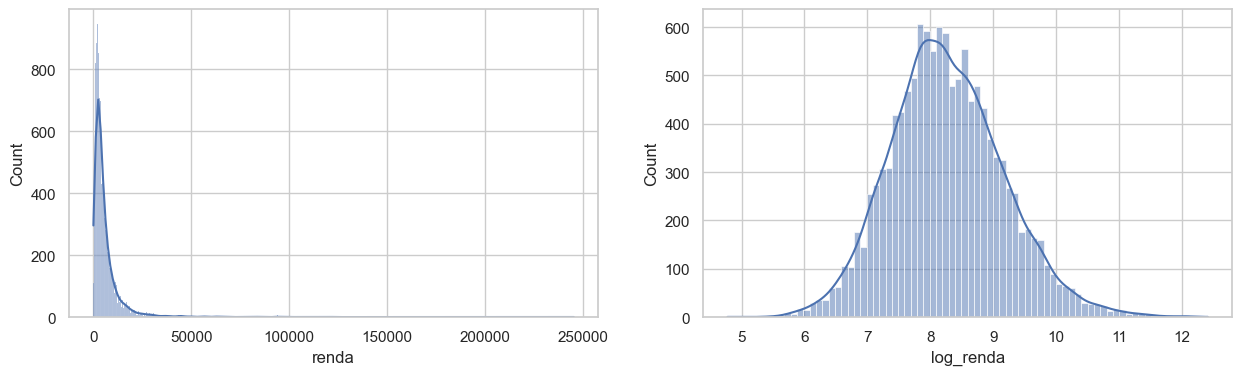

In [13]:
# Verificando a normalidade de renda

fig, axes = plt.subplots(1,2, figsize=[15,4])
sns.histplot(ax=axes[0], x=renda["renda"], kde=True, )
sns.histplot(ax=axes[1], x=renda["log_renda"], kde=True, element="bars")
plt.show()

Como podemos perceber existem vários utliers tentamos ver a normalidade de renda, para isso podem se adotadas algumas técnicas, uma delas é obter o logaritmo da variável, outra seria retirar seus outliers o que veremos a seguir


In [14]:
#Renda sem outliers
renda_out = renda.copy()

<Axes: ylabel='Frequency'>

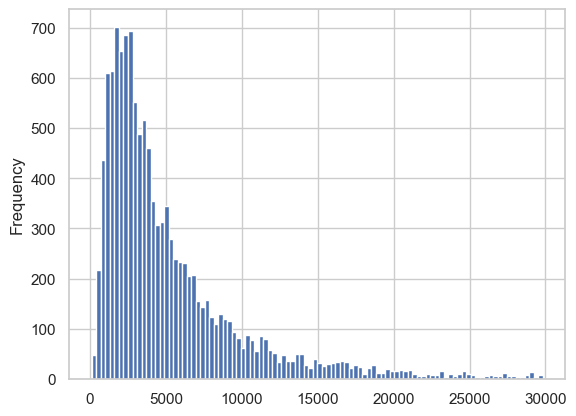

In [15]:
renda_out[renda_out["renda"] <= 30000]["renda"].plot.hist(bins=100)

### Verificando o quanto os outliers consomem do total dos dados

In [16]:
# Quantidade dos dados que restaram sem os outliers
renda_out[renda_out["renda"] <= 15000].shape

(11515, 16)

In [17]:
renda.shape

(12427, 16)

In [18]:
print(round((11515 / 12427 ) * 100, 2), "%")

92.66 %


Os outliers correspondem a $1.83 \%$ do do total dos dados, o que é uma valor considerado baixo na influencia do modelo fina, mas obter o log de renda ainda torna a normalidade dos dados melhor.

In [19]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               12427 non-null  datetime64[ns]
 1   id_cliente             12427 non-null  int64         
 2   sexo                   12427 non-null  object        
 3   posse_de_veiculo       12427 non-null  bool          
 4   posse_de_imovel        12427 non-null  bool          
 5   qtd_filhos             12427 non-null  int64         
 6   tipo_renda             12427 non-null  object        
 7   educacao               12427 non-null  object        
 8   estado_civil           12427 non-null  object        
 9   tipo_residencia        12427 non-null  object        
 10  idade                  12427 non-null  int64         
 11  tempo_emprego          12427 non-null  float64       
 12  qt_pessoas_residencia  12427 non-null  float64       
 13  renda 

### Tratando variáveis categóricas

Para futuramente montarmos um modelo de regresão, precisamos que todsa as variáveis sejam númericas, para isso vamos tratar as variáveis categóricas que segundo as analises bivariádas foram mais relevantes para determinar a renda.


In [20]:
# Criando dumies para as variáveis categóricas.
renda["viuvo_T"] = renda["estado_civil"].apply(lambda x: 1 if x == "Viúvo" else 0)
renda["pensionista_T"] = renda["tipo_renda"].apply(lambda x: 1 if x == "Pensionista" else 0) 
renda["superior_T"] = renda["educacao"].apply(lambda x: 1 if x == "Superior completo" else 0 )
renda["estudio_T"] = renda["tipo_residencia"].apply(lambda x: 1 if x == "Estúdio" else 0 )
renda["sexo_M"] = pd.get_dummies(renda["sexo"], drop_first=True)

In [21]:
#Varificando as correlações entre as variáveis númericas e a variável resposta
renda[['posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'log_renda', 'viuvo_T', 'pensionista_T', 'superior_T',
       'estudio_T', 'sexo_M']].corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda,viuvo_T,pensionista_T,superior_T,estudio_T,sexo_M
posse_de_veiculo,1.000000,0.011342,0.085103,-0.109198,-0.076155,0.131266,0.083105,0.131742,-0.060622,0.001123,0.067540,0.036188,0.337629
posse_de_imovel,0.011342,1.000000,0.007266,0.094254,0.009465,0.003925,0.015367,0.038598,0.031189,-0.011801,0.015943,-0.017423,-0.041071
qtd_filhos,0.085103,0.007266,1.000000,-0.279069,-0.063220,0.902509,0.002192,0.013714,-0.073803,0.005232,0.034492,0.011194,0.080054
idade,-0.109198,0.094254,-0.279069,1.000000,0.321573,-0.253526,0.127069,0.132300,0.157728,-0.018177,-0.087285,0.012324,-0.147360
tempo_emprego,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013,0.413624,0.031188,-0.002412,-0.010807,0.016734,-0.132896
qt_pessoas_residencia,0.131266,0.003925,0.902509,-0.253526,-0.065670,1.000000,0.018683,0.027241,-0.199359,-0.011864,0.020589,0.012425,0.118584
renda,0.083105,0.015367,0.002192,0.127069,0.385013,0.018683,1.000000,0.735684,-0.022990,-0.009129,0.018961,0.028391,0.265325
log_renda,0.131742,0.038598,0.013714,0.132300,0.413624,0.027241,0.735684,1.000000,-0.017591,-0.010226,0.044054,0.041852,0.353491
viuvo_T,-0.060622,0.031189,-0.073803,0.157728,0.031188,-0.199359,-0.022990,-0.017591,1.000000,-0.004405,-0.015008,-0.012749,-0.118588
pensionista_T,0.001123,-0.011801,0.005232,-0.018177,-0.002412,-0.011864,-0.009129,-0.010226,-0.004405,1.000000,0.028378,-0.002098,0.004489


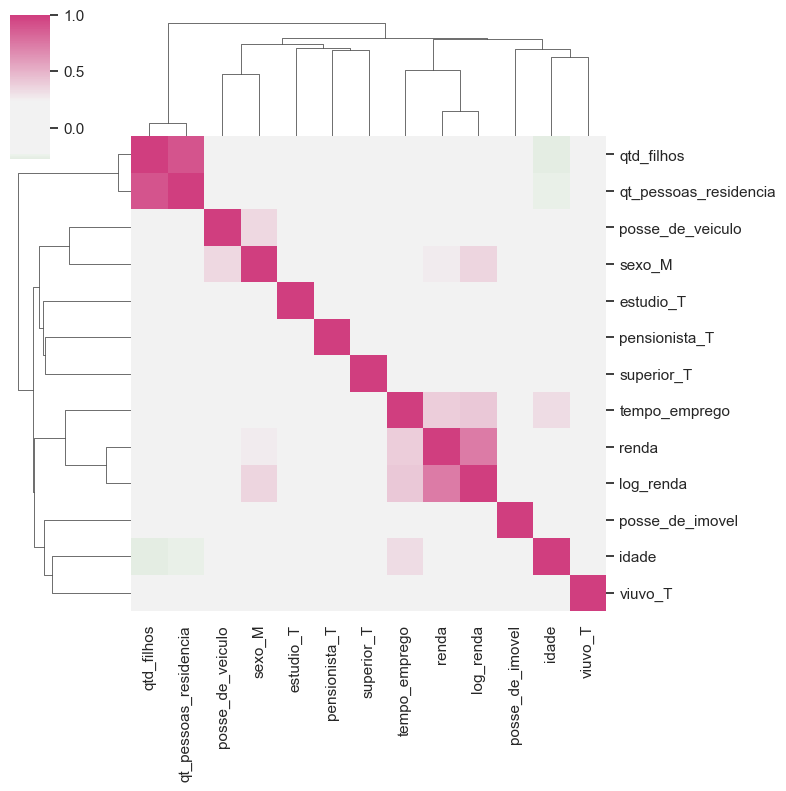

In [22]:
cmap = sns.diverging_palette(h_neg=125 ,h_pos=350,n=10, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(renda[['posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'log_renda', 'viuvo_T', 'pensionista_T', 'superior_T',
       'estudio_T', 'sexo_M']].corr(), figsize=(8, 8), center = 0, cmap=cmap)

### Selecionando as variáveis explicativas (X) e a variável resposta (y)

In [23]:
# Variável explicativa
X = renda[['posse_de_veiculo','idade', 'tempo_emprego', 'qt_pessoas_residencia','sexo_M', "qtd_filhos"]]

In [24]:
# Variável resposta
y = renda["renda"]

### Separando em base de treino e base de teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=402, train_size=0.3)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Selecionando o modelo

Para esse caso será montada um modelo de decisão de árvore de regressão visando uma menor r-squared e uma maior dispersão nos residuos.

#### Criando o modelo sem tratamentos

In [26]:
# Criando o modelo 

reg = DecisionTreeRegressor(random_state=100)

reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [27]:
# Variável resposta criada pelo modelo
y_pred = reg.predict(X_train)

In [28]:
# R-squared do modelo
mean_squared_error(y_train, y_pred)

11468403.33450751

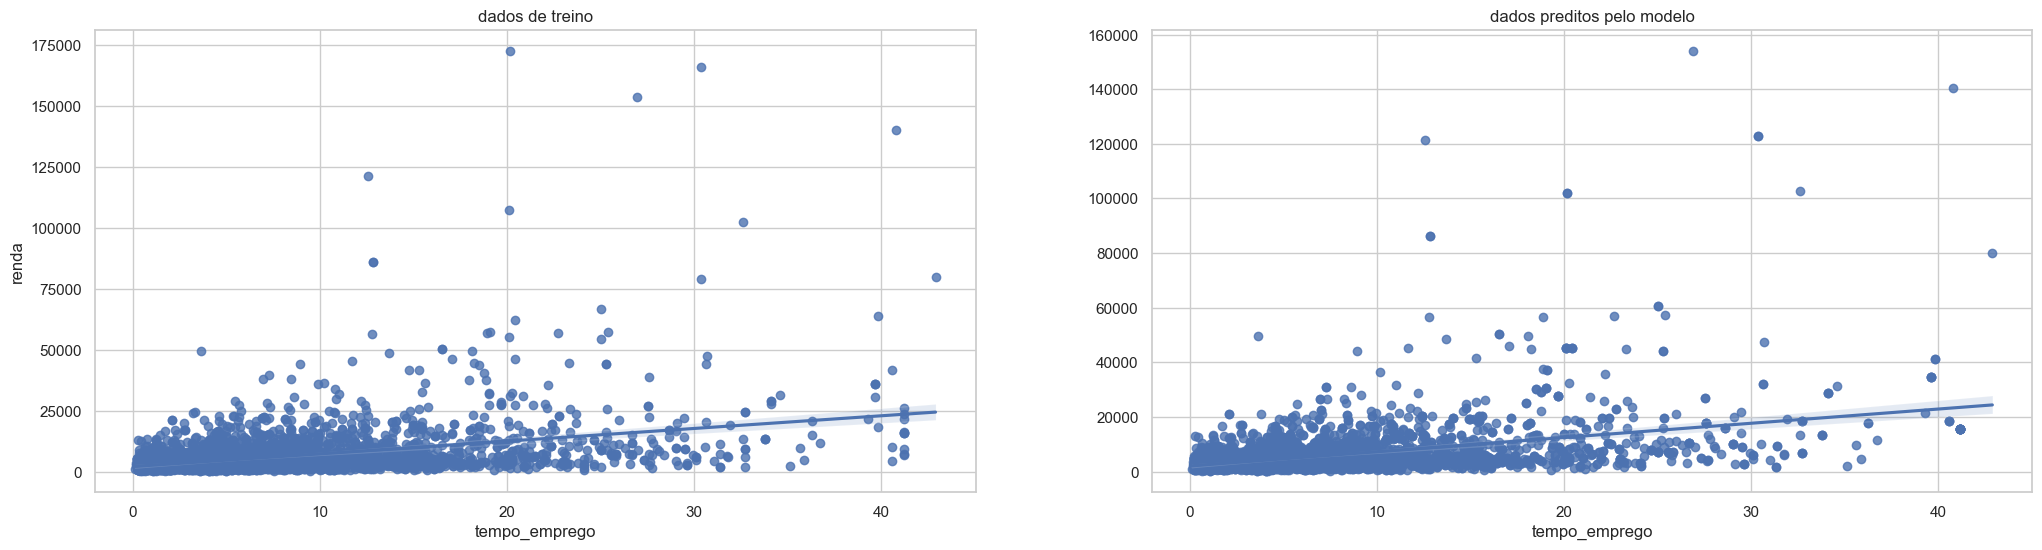

In [29]:
fig, axes = plt.subplots(1,2, figsize=[25,6])

sns.regplot(ax=axes[0], x=X_train["tempo_emprego"], y=y_train)
axes[0].set_title("dados de treino")
sns.regplot(ax=axes[1], x=X_train["tempo_emprego"], y=y_pred)
axes[1].set_title("dados preditos pelo modelo")
plt.show()

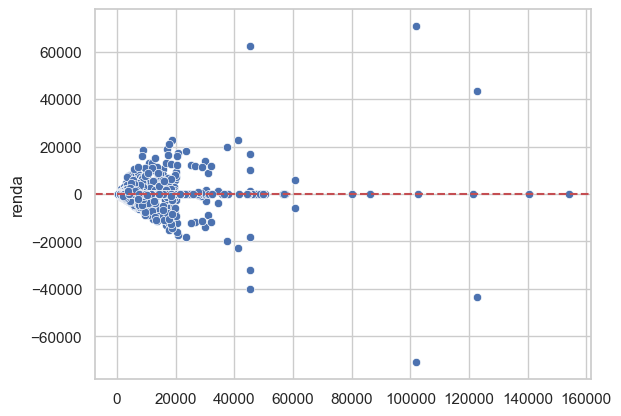

In [30]:
residuos = y_train - y_pred

#Gráfico de residos
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

#### Avaliação do modelo sem tratamentos

Utilizando o modelo de Árvore de Decisão do Sk-learn sem nem um tipo de alteração nos dados, temos um R-squared de $11468403.33450751$ o que resulta em um caso de overfiting, um modelo fielmente ajustado aqueles tipos de dados, e quando vizualizamos o gráfico dew residuos, temos uma padrão muito evidente, com alguns outliers.

### Tratamento do modelo

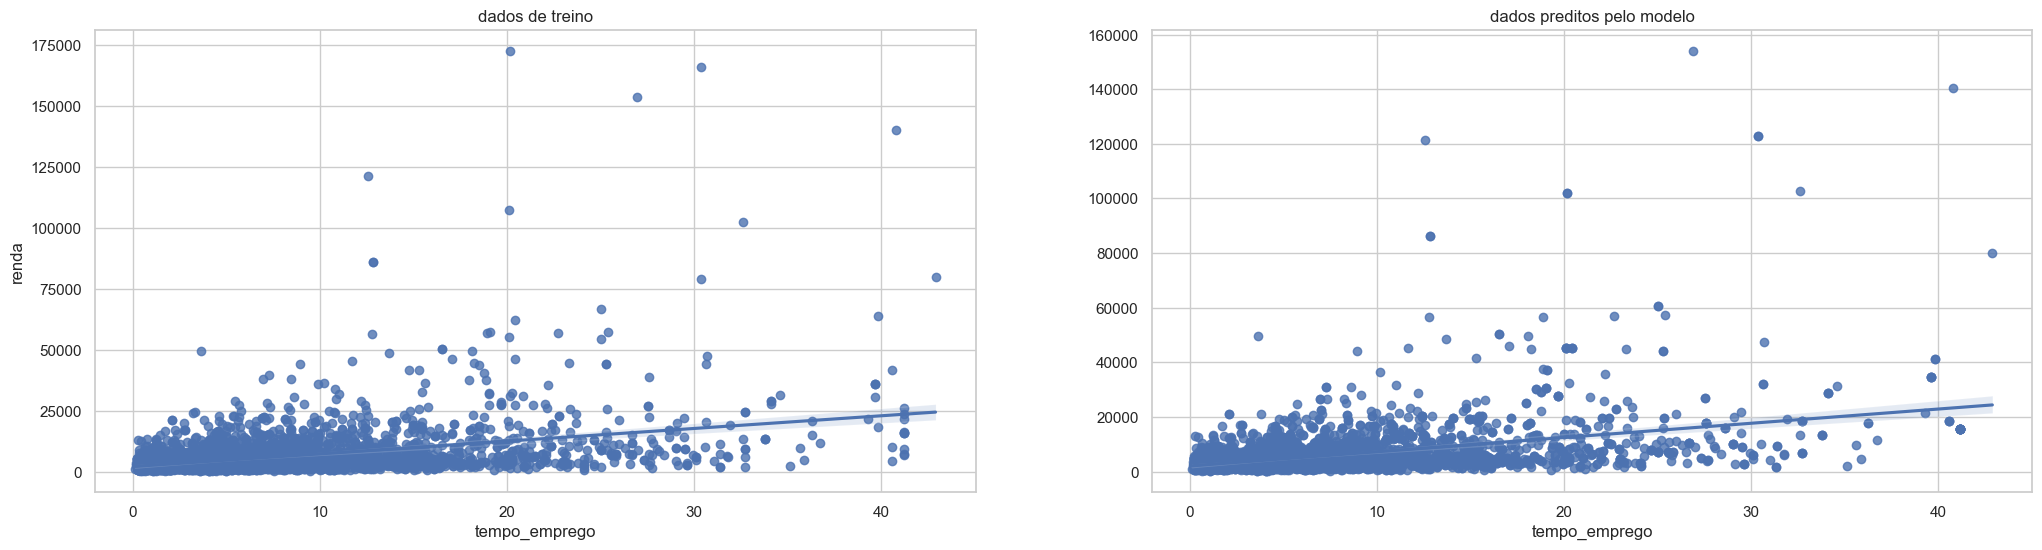

In [31]:
fig, axes = plt.subplots(1,2, figsize=[25,6])

sns.regplot(ax=axes[0], x=X_train["tempo_emprego"], y=y_train)
axes[0].set_title("dados de treino")
sns.regplot(ax=axes[1], x=X_train["tempo_emprego"], y=y_pred)
axes[1].set_title("dados preditos pelo modelo")
plt.show()

Pode ser visto no gráfico de regressão que os outliers alteram muito a angulação da reta, dessa forma criando um modelo overfitado, um modelo que se ajusta apenas para os dados de treino. <br>
A partir desse ponto serão realizados testes para ajustar os outliers

### Variável resposta em forma de logaritmo


In [32]:
# Transformando a variável renda em logartimo
y_train = np.log(y_train)

In [33]:
# Modelo ajustado

reg = DecisionTreeRegressor(random_state=100)

reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [34]:
y_pred = reg.predict(X_train)

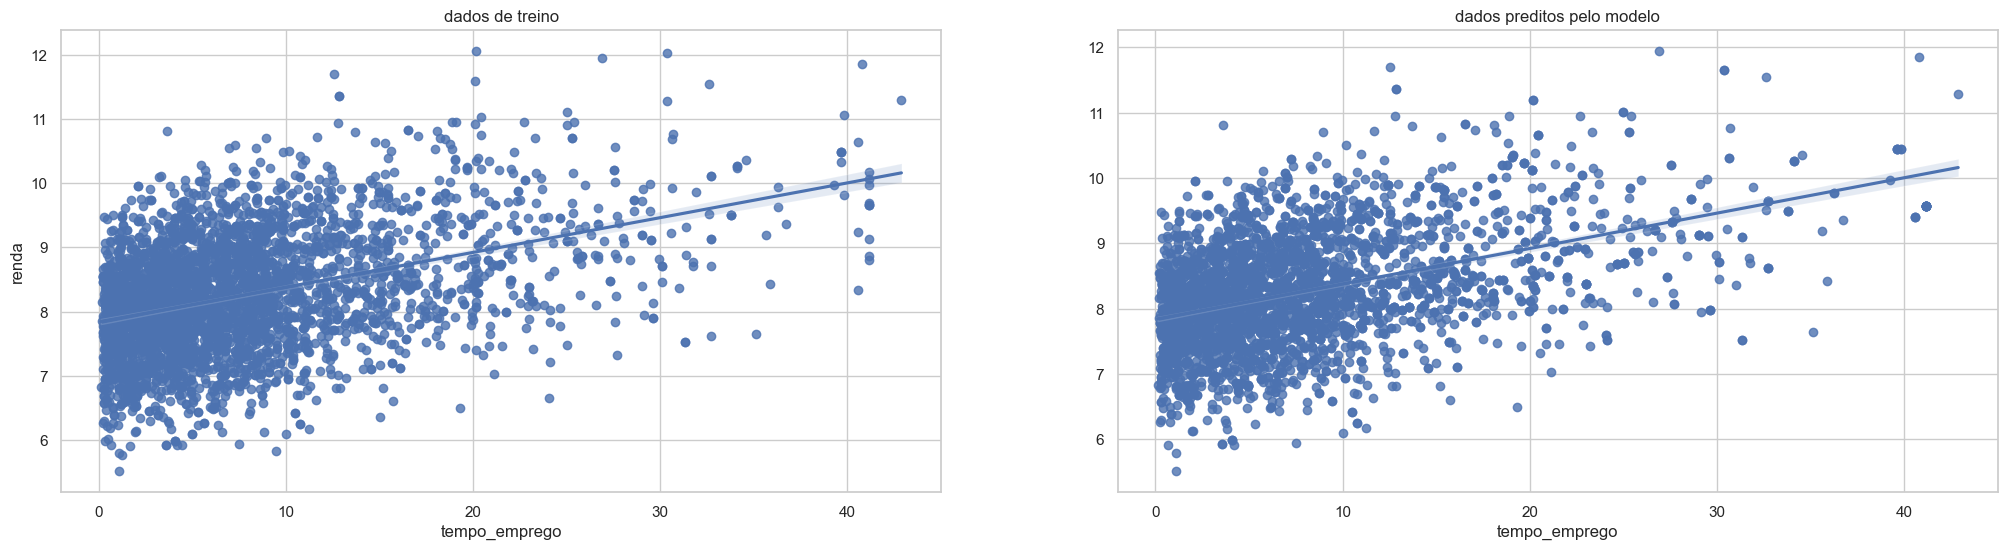

In [35]:
fig, axes = plt.subplots(1,2, figsize=[25,6])

sns.regplot(ax=axes[0], x=X_train["tempo_emprego"], y=y_train)
axes[0].set_title("dados de treino")
sns.regplot(ax=axes[1], x=X_train["tempo_emprego"], y=y_pred)
axes[1].set_title("dados preditos pelo modelo")
plt.show()

In [36]:
mean_squared_error(y_train, y_pred)

0.12249513527358459

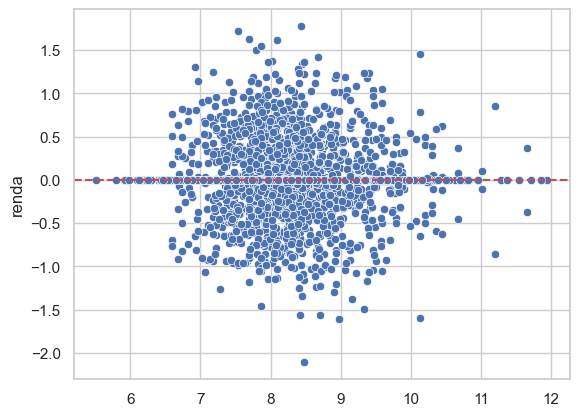

In [37]:
residuos = y_train - y_pred

#Gráfico de residos
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

Temos um incio, saimos de um modelo overftiado e com um gráfico de dispersão de residuos bem padronizado, para um modelo com um r-squared baixo e com uma melhor visualização do gráfico de dispersão de residuos

In [38]:
# Modelo ajustado 2

reg = DecisionTreeRegressor(random_state=100, ccp_alpha=0.006)

reg.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.006, random_state=100)

In [39]:
y_pred = reg.predict(X_train)

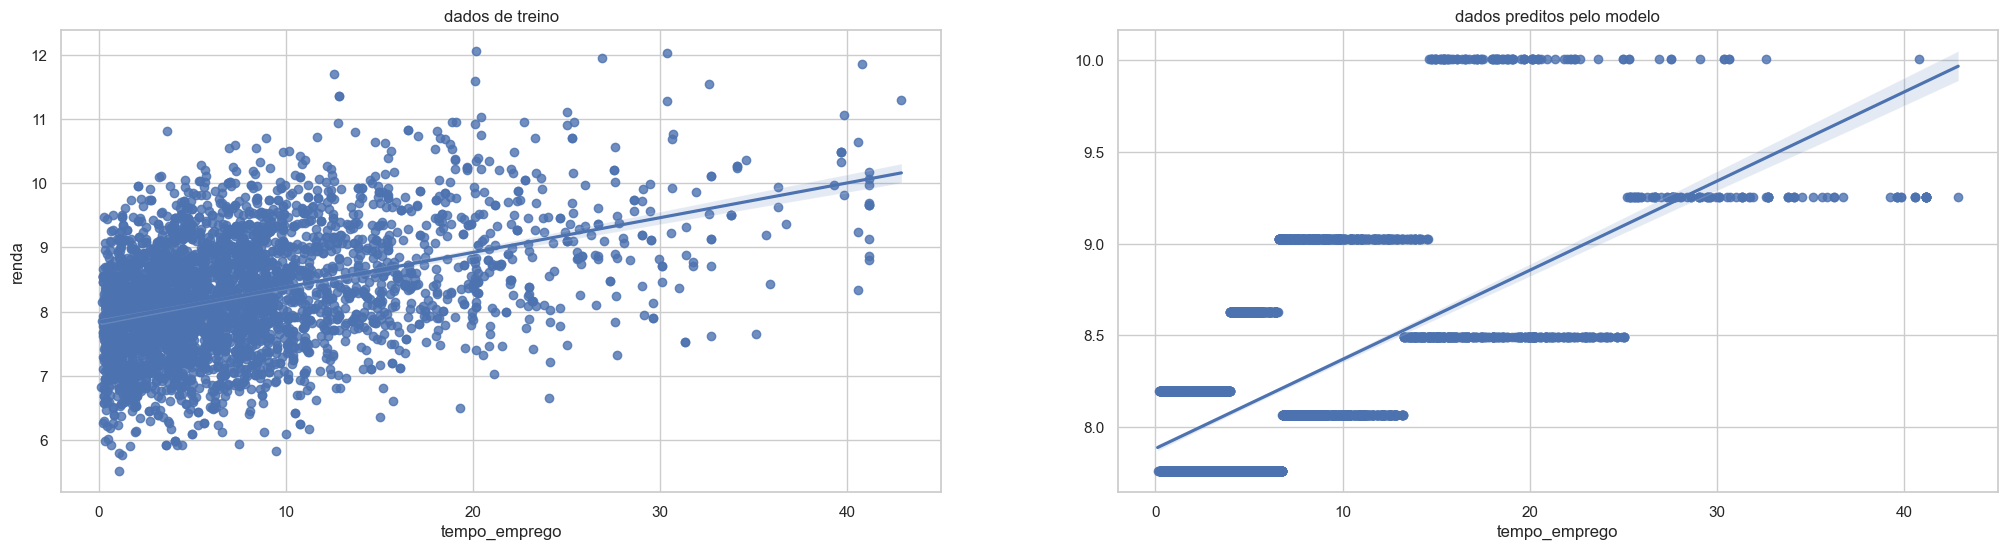

In [40]:
fig, axes = plt.subplots(1,2, figsize=[25,6])

sns.regplot(ax=axes[0], x=X_train["tempo_emprego"], y=y_train)
axes[0].set_title("dados de treino")
sns.regplot(ax=axes[1], x=X_train["tempo_emprego"], y=y_pred)
axes[1].set_title("dados preditos pelo modelo")
plt.show()

In [41]:
mean_squared_error(y_train, y_pred)

0.527325620824828

In [42]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

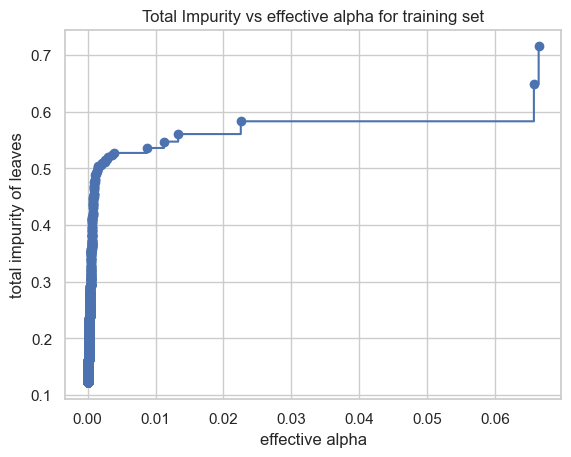

In [43]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

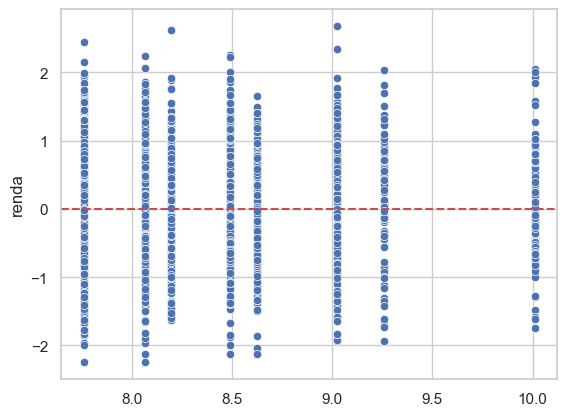

In [44]:
residuos = y_train - y_pred

#Gráfico de residos
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

#### Avaliando o modelo final

O melhor ajuste foi realizado quando o ccp_alpha que é uma técnica utlizada pra simplificar a árvore de regressão foi ajustado para $0.006$ e a variável resposta foi transformada em logaritmo

In [45]:
# Melhor árvore de regressão

clf_reg = DecisionTreeRegressor(random_state=4002, ccp_alpha=0.006)

clf_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.006, random_state=4002)

In [46]:
# Vizualizando a árvores


# DOT data
dot_data = tree.export_graphviz(clf_reg, out_file=None, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png", filename="arvore1") 
graph.render()

'arvore1.png'

## Etapa 5 Crisp-DM: Avaliação dos resultados


### Testando o modelo nos dados de teste

In [47]:
 y_predict = clf_reg.predict(X_test)

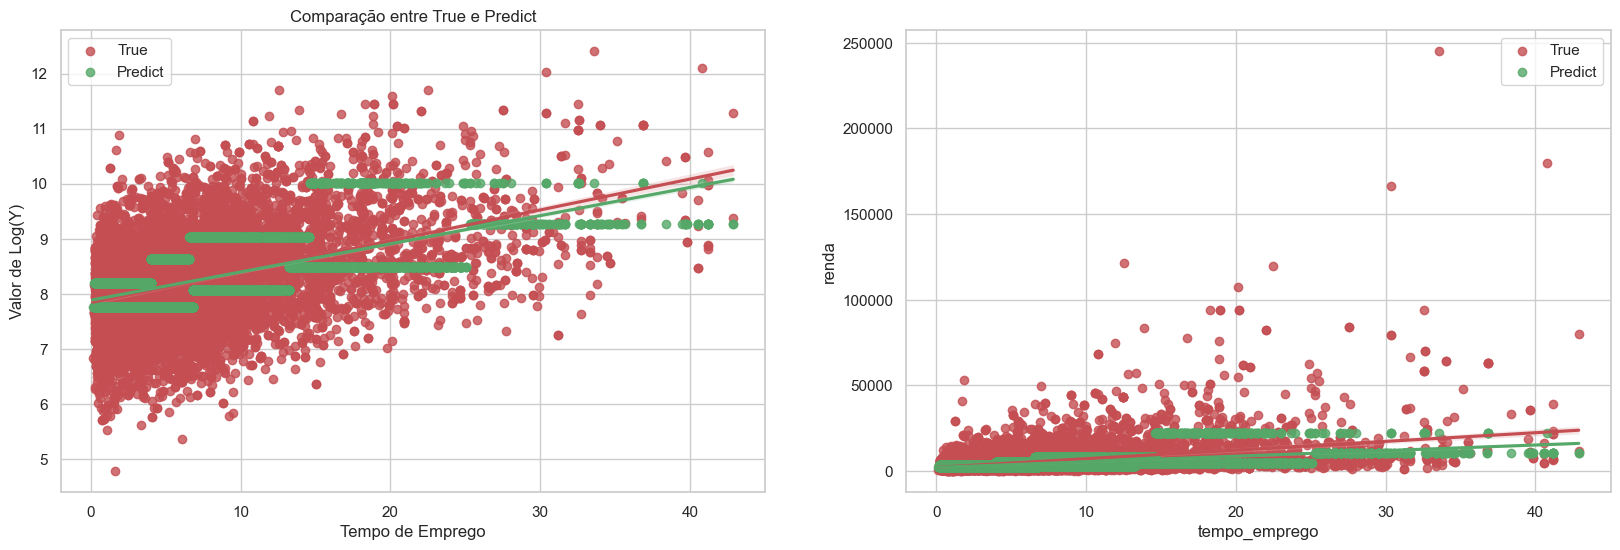

In [48]:
fig, axes = plt.subplots(1, 2, figsize=[20, 6])

sns.regplot(ax=axes[0], x=X_test["tempo_emprego"], y=np.log(y_test), color="r", label="True")
sns.regplot(ax=axes[0], x=X_test["tempo_emprego"], y=y_predict, color="g", label="Predict")

sns.regplot(ax=axes[1], x=X_test["tempo_emprego"], y=y_test, color="r", label="True")
sns.regplot(ax=axes[1], x=X_test["tempo_emprego"], y=np.exp(y_predict), color="g", label="Predict")

axes[0].set_title("Comparação entre True e Predict")
axes[0].set_xlabel("Tempo de Emprego")
axes[0].set_ylabel("Valor de Log(Y)")
axes[0].legend()
axes[1].legend()



plt.show()

In [49]:
# Avaliação do score da árvore
mean_squared_error(np.log(y_test), y_predict)

0.532582524923051

## Etapa 6 Crisp-DM: Implantação

Uma forma de implementação do modelo seria um caso de solicitação de empréstimo, onde uma empresa determina a quantidade do valor do empréstimo de acordo com a renda predita pelo modelo.

### Cenário 

Foi solicitado pela empresa um modelo para predizer qual a renda de determinados clientes baseando-se em uma base antiga de clientes de acordo com as seguintes perguntas.

- posse_de_veiculo: se o cliente possui ou não um veiculo
- idade: Idade do cliente
- tempo_emprego: Tempo de contribuição
- qt_pessoas_residencia: Quantidade de pessoas dependentes
- sexo_M: Se é Homem ou Mulher
- qtd_filhos: Quantidade de filhos do cliente

Após essas perguntas o modelo deve predizer a possivel renda do cliente, baseado nessa renda será liberado o empréstimo no valor de 10 vezes a renda do cliente, com juros de 2.15% ao mês em 36 mêses.

Além disso deve ser relatado o valor do emprestimo, valor de cada parcela e o valor final do empréstimo.

### Salvando uma base de teste para o script do relátorio



In [50]:
X_test.iloc[:800, :].to_csv("NovosClientes", index=False)

## Essa atividade foi feita em formato de script e pode vizualizala clicando no link abaixo


Clique [aqui](https://github.com/CarlosDouradoPGR/EBAC/blob/main/Modulo16/projeto_2/script_relatorio.py) para visitar o GitHub com script.
